In [4]:
RANDOM_SEED=1234

# Step 0 Import packages

#Basic dataframe, array, and math stuff
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport as pp

#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator
import pandas_profiling # requires import and prior install 

#Timer
from timeit import default_timer as timer #import a timer

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
import math #math functions
import numpy as np    #numerical package
from math import sqrt
import itertools
import xgboost as xgb
import lightgbm as lgb
# from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique



#Scikit learn
import sklearn as sk  #scikit learn
 
from sklearn import tree
from sklearn import preprocessing    

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # Regression modeling package
from sklearn.linear_model import LogisticRegression as logreg # Classification modeling package
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.linear_model import  RidgeCV, ElasticNet, LassoCV, LassoLarsCV # complex models found on net

from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix #for 2-class model
from sklearn.metrics import roc_curve #for 2-class model
from sklearn.metrics import mean_squared_error, r2_score # evaluation metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split as tts #train test split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.impute import SimpleImputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample #sampling
from sklearn.decomposition import PCA #principal components
from sklearn.naive_bayes import GaussianNB # Classification modeling package
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


from scipy import misc #Lots of stuff here
from scipy import stats as st
from scipy.stats import skew 
from scipy.stats import pearsonr


#Graphing
import altair as alt
import seaborn as sns
import pydot  #For model plotting
from IPython.display import SVG #For model plotting
from IPython.display import display #For model plotting
import matplotlib.pyplot as plt #plotting
import matplotlib as mpl #image save
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility

%matplotlib inline

# Set rows and columnns for display so that we can see more than just 10 rows from print
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

# Set seaborn charts to seaborn default settings
sns.set()

In [2]:
# Read the data
train = pd.read_csv('../titanic2/train.csv')
test = pd.read_csv('../titanic2/test.csv')

train.set_index=('PassengerId')

In [42]:
# Review train headings
# Looks like a lot of variables of different types. We need to get a breakdown

display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# This generates the list of whats in the data set. Interesting that training data and test data are the same size
#  891 rows of training data, 418 rows of test data
# 11 variable fields
# Need to see whats in the type of variables next

train.shape, test.shape

((891, 12), (418, 11))

In [20]:
# Look at basic descriptive statistics on the numerical variables
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ford, Mr. William Neal",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Embarked      2
Age         177
Cabin       687
dtype: int64
Number of variables missing data: 3


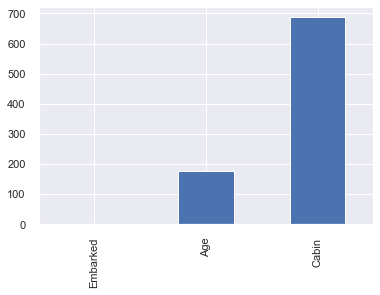

In [49]:
# Look for missing values
# Cabin is missing 77% of records. Let populate this with unknown. Its possible that lower class passengers were not assigned
#  cabins (as happens with trains even to today)
# A quarter of age is missing, will likely need to be imputed

missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
print(missing)
missing.plot.bar()

df_missing=pd.DataFrame(missing)
df_missing.nunique()
print('Number of variables missing data:',len(df_missing))

In [22]:
# look 

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


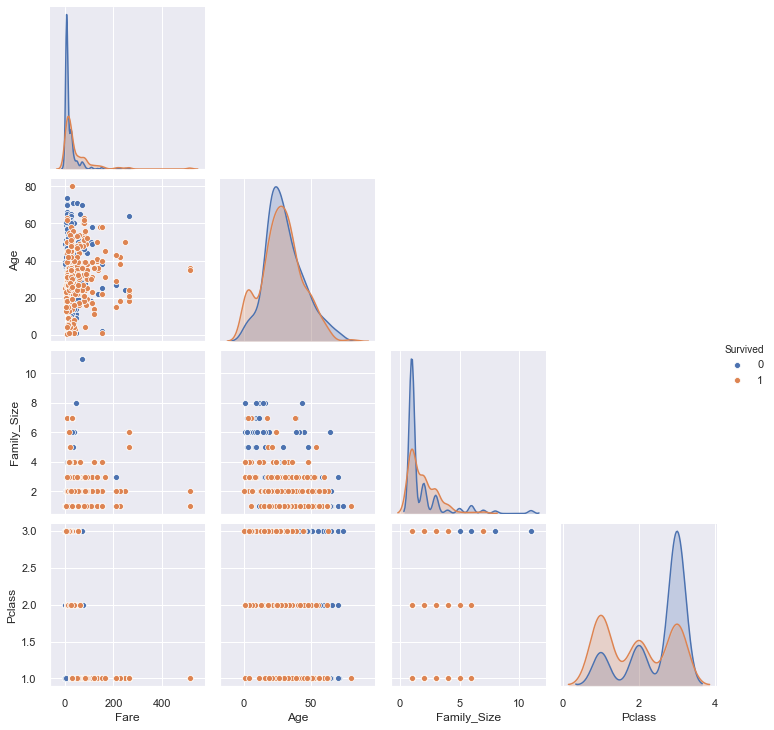

In [48]:
# Pairplot for Correlation
# 1. Pclass 1 and 2 has higher survival than death rate, not the case for Pclass 3
# 2. Bigger family groups tend to be in the lower class (and have lower chance of survival)
# 3. There are some significant outliers in fare. SOme first class passengers paid a huge amount 
#    for their tickets (they survived)

#Creating new family_size column
df=pd.DataFrame(train)
df['Family_Size']=df['SibSp']+df['Parch']+1

sns.pairplot(data=df[["Fare","Survived","Age","Family_Size","Pclass"]],hue="Survived", dropna=True, corner=True)

### Research Design and Modeling Methods

In order to design the research, we will analyze the data to make some inferences on what data fields we need to creat/focus on for the purpose of creating a classification model

Hypothesis 1: Age and class have a bearing on survival rates
The chart for H1 shows that the higher your class, the higher your chance of surival.
It also shows that very young passengers (<5 for third class, under 10 and first and second class) had a high survival rate
The data also shows that regardless of class, over 60 year olds had a veyr low survival rate

Hypothesis 2: The higher the fare, the higher the class
Hypothesis chart 2a showed the hypothesis to be wrong. In fact some 3rd class passengers were paying as much as 1st class passengers. Something seemed amiss.
I took the data into excel and looked at the SibSp grouping with the highest number is SibSp (8 in the group) and noticed that the fare paid for all 8 was $69.55! I checked the next highest group (5 in group) and all 5 passengers paid $46.90. This indicates that the fare paid is for the WHOLE family group, not individual passenger.
To know the acutal fare paid per passenger, you need to take the fare paid divided by passengers in the group, in this case passenger plus sibsp (1+SibSp)
Hypothesis chart 2b show that the revised hypothesis is correct, we need to look at fare per passenger in the group.

Hypothesis 3: Deck level has an impact on survival rate
Deck level is derived from the first letter of Cabin. This hypothesis also implies that the lower class passengers were not assigned a cabin (find one when you board) and so were listed on the manifest as unknown cabin.



Text(0.5, 1.05, 'Chart H1: Survival is correlated with Age and Class (Right)')

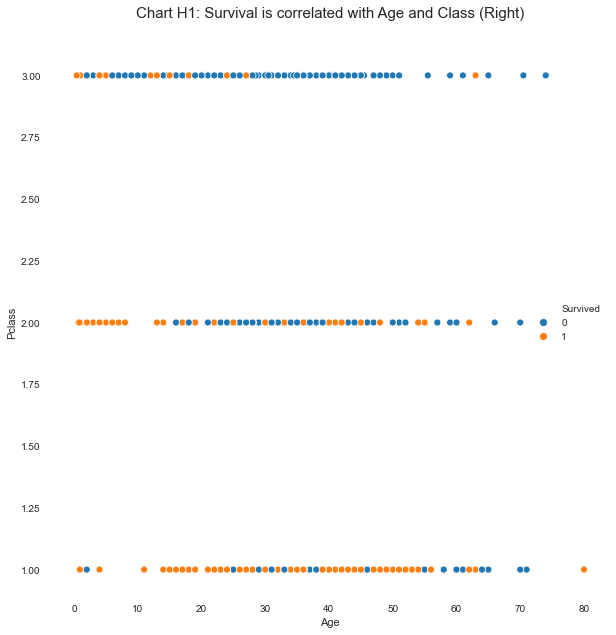

In [43]:
# Hypothesis 1 Age and class have a bearing on survival rates
# Chart H1: Blue did not survive, orange survived 


plt.figure(figsize=(10,10))
train_plot=sns.scatterplot(x="Age", y="Pclass", hue="Survived",data=train)
plt.title('Chart H1: Survival is correlated with Age and Class (Right)', y=1.05, size=15)


Text(0.5, 1.05, 'Chart H2a: Passenger Class and Fare are correlated (Wrong)')

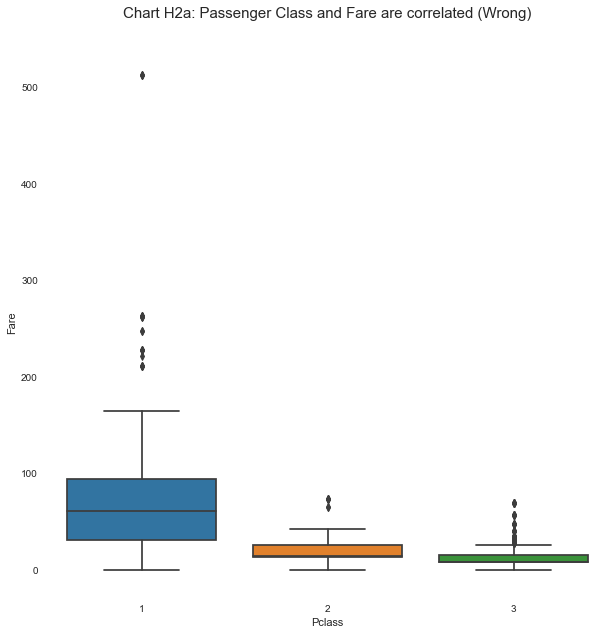

In [40]:
# Hypothesis 2a Fare and PClass Correlate
# They do not, fare includes fare for entire group (1+SibSp)
# Need to run this correlation for fare per passenger

plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Chart H2a: Passenger Class and Fare are correlated (Wrong)', y=1.05, size=15)

Text(0.5, 1.05, 'Chart H2a: Passenger Class and Fare Per Passenger are correlated (Right)')

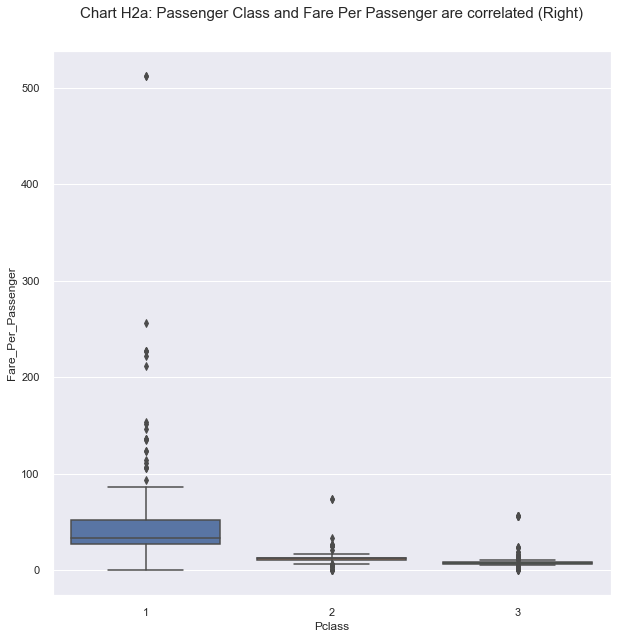

In [13]:
# Hypothesis 2b Fare per passenger and PClass Correlate
# Hypothsis is correct, we need to calculate family size and fare per passenger

df=pd.DataFrame(train)
df['Family_Size']=df['SibSp']+df['Parch']+1
df['Fare_Per_Passenger']=df['Fare']/df['Family_Size']

plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Fare_Per_Passenger', data=df) 
plt.title('Chart H2a: Passenger Class and Fare Per Passenger are correlated (Right)', y=1.05, size=15)

Text(0.5, 1.05, 'Chart H3: Deck level and Survival are correlated (Right)')

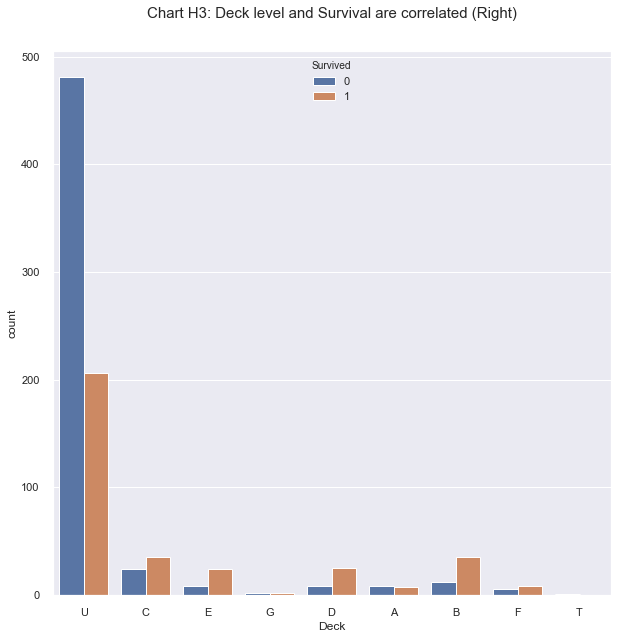

In [29]:
# Hypothesis 3 Deck level corresponds with survival rate
# Hyposthesis appears to be correct. Poor passengers likely to not be assigned cabin on boarding and have lower survival

df=pd.DataFrame(train)

# Populate null cabin with 'unknown'
df.Cabin = df.Cabin.fillna('Unknown')    

# Create Field 'Deck' based on cabin type'

df['Deck'] = train['Cabin'].apply(lambda x: x[0] if not pd.isna(x) else 'U')

# Create 2 column chart showing survived and died by deck type (U is unknown)
plt.figure(figsize=(10,10))
sns.countplot(data=df, x=df['Deck'], hue=df['Survived'])
plt.title('Chart H3: Deck level and Survival are correlated (Right)', y=1.05, size=15)

In [ ]:
# Hypothesis 4 Fare paid corresponds with deck level and survival
# Hypothesis 4 There are under represented populations which need to be oversampled (total survived vs perished)

## Transformation Steps

1) Impute age

2) Fill Embarked (2 missing rows) with mode

3) Replace missing cabin number with "unknown"

4) Extrapolate deck from ticket number (the lower in the ship you are, the lower your chance of survival)

5) Create a family size column (larger families have trouble moving around a ship, lowering chance of survival) and traveling      alone variable

6) Create fare per passenger column

7) Drop Cabin Number after driving deck level from cabin number

8) Remove Ticket number Ticket number does not appear to have predictive value

9) Generate dummy categories for gender, passenger class, embarked, deck and family size


In [5]:
# Step 1
# Reload data in case EDA has modified the data

# Read the data
train = pd.read_csv('../titanic2/train.csv')
test = pd.read_csv('../titanic2/test.csv')

#####Upsample#####
### DON'T RUN THIS YET, NEED TO CHECK WITH PROF LARRY WHEN TO DO THIS, BEFORE TRANSFORMATION? ####

#  from sklearn.utils import resample
#  # Separate majority and minority classes
#  minority = train[train['Survived']==1]
#  majority = train[train['Survived']==0]

#  #Upsample minority class
#  newbank = resample(minority, replace=True, n_samples=len(majority), random_state=123) # reproducible results
#  newbank= pd.concat([majority, newbank])
#  newbank.response_yes.value_counts()


#  X_train=np.array(newbank[['loan_yes', 'default_yes', 'housing_yes']])
#  y_train=val.column_or_1d(newbank[['response_yes']]) 

######## End Upsample code########




# Step 2 create a set of data that combines all the predictor features (X Values)
# Transform all the predictor features



# 2a. Combine train and test data sets 
# First create a set that excludes 'Survived'
# Then combine sets and set index to 'PassengerID'
X_train=train.drop(['Survived'], axis=1)

all_data = pd.concat((X_train, test))

# display(all_data)



# 2b. Transform Data

df=pd.DataFrame(all_data)

# Impute Age with median age: 
df['Age'].fillna(df['Age'].median(), inplace = True)

# Complete embarked with mode: 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

#Turn cabin number into Deck: 
df.Cabin = df.Cabin.fillna('Unknown')
df['Deck'] = train['Cabin'].apply(lambda x: x[0] if not pd.isna(x) else 'U')

# Creating new family_size column 
df['Family_Size']=df['SibSp']+df['Parch']+1

# Creating new travel alone column 
df['TravelAlone']=np.where((df['Family_Size'])>1, 0, 1)

# Creating new fare per passenger column 
df['Fare_Per_Passenger']=df['Fare']/df['Family_Size']

# Logistic Regression works better with binary or categorical variables, so convert family size dummy variables
df=pd.get_dummies(df, columns=["Pclass","Sex","Embarked","Deck","Family_Size"])

# Drop variables which don't are useful predictors or are replicated elsewhere: 
df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Fare', 'SibSp', 'Parch' ], axis=1, inplace = True)

# Impute missing Fare_Per_Passenger
df = df.fillna(all_data.mean())

all_data_transformed=df

display(all_data_transformed)

all_data_transformed.to_csv('../Titanic2/alldata_transformed.csv')

,Age,TravelAlone,Fare_Per_Passenger,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Family_Size_1,Family_Size_2,Family_Size_3,Family_Size_4,Family_Size_5,Family_Size_6,Family_Size_7,Family_Size_8,Family_Size_11
0,22.0,0,3.625000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,38.0,0,35.641650,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,1,7.925000,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,35.0,0,26.550000,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,35.0,1,8.050000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,1,8.050000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
414,39.0,1,108.900000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
415,38.5,1,7.250000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
416,28.0,1,8.050000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [14]:
#2c create matrices for classification tools

train = pd.read_csv('../titanic2/train.csv')
alldata_transformed = pd.read_csv('../titanic2/alldata_transformed.csv')

df = alldata_transformed.loc[:,'Age':'Family_Size_11']

X_train = df[:train.shape[0]]
X_test = df[train.shape[0]:]
y = train.Survived

print(X_train)


      Age  TravelAlone  Fare_Per_Passenger  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Deck_A  Deck_B  \
0    22.0            0             3.62500         0         0         1           0         1           0           0           1       0       0   
1    38.0            0            35.64165         1         0         0           1         0           1           0           0       0       0   
2    26.0            1             7.92500         0         0         1           1         0           0           0           1       0       0   
3    35.0            0            26.55000         1         0         0           1         0           0           0           1       0       0   
4    35.0            1             8.05000         0         0         1           0         1           0           0           1       0       0   
..    ...          ...                 ...       ...       ...       ...         ...       ...      

In [6]:
# 3a check that train and test data match the train and test data
X_train.shape, X_test.shape

((891, 29), (418, 29))

### 3a Run Logistic Regression
Model gives us a 0.82 R2 score and 0.75598 on Kaggle cross validation, which is a good start.


In [41]:
# This does a logistic regression and scores it.

log_reg=LogisticRegression()
log_reg.fit(X_train, y)
log_reg.score(X_train, y)
acc_log_reg = round(log_reg.score(X_train, y) * 100, 2)
print(acc_log_reg)

81.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Run logistic Regression prediction on test data and submit to Kaggle for cross validation

LogReg_Pred=(log_reg.predict(X_test))
                 
df_LogReg_Pred=pd.DataFrame(LogReg_Pred)
df_LogReg_Pred.to_csv('../Titanic2/linRegPred.csv')

### 3b Gaussian Naive Bayes (GaussianNB)
Model gives us a 0.43 R2 score and 0.40669 on Kaggle cross validation, which is worse than a Random guess.

In [40]:
# This does a Gaussian Naive Bayes Classification and scores it.

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y)
GNB.score(X_train, y)
acc_GNB = round(GNB.score(X_train, y) * 100, 2)
print(acc_GNB)

43.21


In [25]:
# Run Gaussian Naive Bayes Classification prediction on test data and submit to Kaggle for cross validation

clf_Pred=(clf.predict(X_test))
                 
df_GNB_Pred=pd.DataFrame(clf_Pred)
df_GNB_Pred.to_csv('../Titanic2/GNBPred.csv')

### 3c Random Forest Classifier
Model gives us a 0.98 R2 score, but 0.72 on Kaggle cross validation, indicating overfitting

In [39]:
# This does a Random Forest Classification and scores it.

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y)
random_forest.score(X_train, y)
acc_random_forest = round(random_forest.score(X_train, y) * 100, 2)
print(acc_random_forest)

98.32


In [7]:
#ROC Curve generation

y_pred_prob=logreg.predict_proba(X_train)
fpr, tpr, thresholds=roc_curve(y,y_pred_prob)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, Test Set, Logistic Regression (Identical for NB)')
plt.legend(loc="lower right")
plt.show()

TypeError: predict_proba() missing 1 required positional argument: 'X'